In [1]:
import pandas as pd
import openpyxl
import xlrd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('C:/Users/Javier/Documents/GIT/Repositories/TFM-Textil-Santanderina/data/raw/ejemplo_datos.xlsx', engine='openpyxl')

In [4]:
#the twelveth column is our quantity
data.iloc[:,12]

0        5.0
1        5.0
2        1.0
3        1.0
4        1.0
       ...  
412    624.8
413    624.8
414    624.8
415    624.8
416    624.8
Name: Cantidad, Length: 417, dtype: float64

In [5]:
#the first one is the type of document
d = data.iloc[:,0]
d

0      F
1      F
2      F
3      F
4      F
      ..
412    F
413    F
414    F
415    F
416    F
Name: TipoDoc, Length: 417, dtype: object

**We want to know in time the evolution of the total quantity of metres sold and refund to our petitioners (other businesses).**

esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona


In [4]:
from matplotlib import pyplot

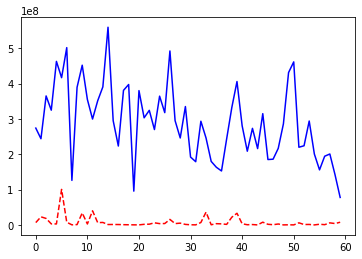

In [8]:
pyplot.plot(qmf, 'b', label = 'Metros facturados de producto.')
pyplot.plot(abs(qma), '--r', label = 'Metros abonados de vuelta.')

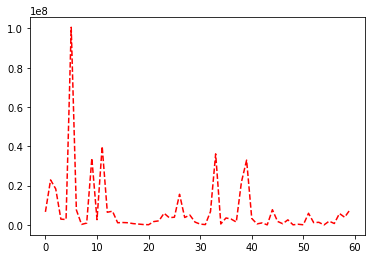

In [9]:
pyplot.plot(abs(qma), '--r', label = 'Metros abonados de vuelta.')

In [40]:
n_months = np.array(range(1,13))

In [24]:
months = np.tile(n_months, 5)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12])

In [54]:
quantity_pd = pd.DataFrame({'Quantity_mtrs': qmf, 'Months' : months})

In [44]:
from sklearn.linear_model import LinearRegression

In [59]:
y = quantity_pd.Quantity_mtrs

In [60]:
y = y.values.reshape(-1,1)
y.shape

(60, 1)

In [61]:
x = quantity_pd.Months

In [62]:
x = x.values.reshape(-1,1)
x.shape

(60, 1)

In [63]:
model = LinearRegression()

In [65]:
model = LinearRegression().fit(x,y)

In [67]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.13351618852527802


Now let's try to obtain the $R^2$ to our refunds:

In [73]:
refund_pd = pd.DataFrame({'Refund_mtrs': qma, 'Months' : months})

In [78]:
y = refund_pd.Refund_mtrs
y = y.values.reshape(-1,1)
y.shape

(60, 1)

In [79]:
x = refund_pd.Months
x = x.values.reshape(-1,1)
x.shape

(60, 1)

In [80]:
model = LinearRegression()

In [81]:
model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.00016594337897957168


Note the cycical componente we can observe in the total sold metres of product, being ist worts downshift around summer, in the refund we observe a constant line with exceptions in the peaks of  the production. We see a considerable decresase during the last year 2019 in our total quantities sold, but as we said, the refund metres quantity stay unchanged.

**Also, it will be interesting to ask ourselves if that decresaded in our sells means less income to the firm. Let's focus now on the monthly time series of our incomes and refunds (in $€$)**

In [2]:
#before initializing this loop we want to explain which
#pmf is a numpy array which will contain the sum for each month 
# the cumulative sum of all the money billed (in euros) to other businesses:
pmf = np.empty(0)
#pma is like pmf but being the cumulative refund made to the customers (in €) returned
#by any reason by the customers
pma = np.empty(0)

#our constants...
#excels in our repositorie:
tablas20_ = glob.glob("C:/Users/Javier/Documents/GIT/Repositories/TFM-Textil-Santanderina/data/raw/20*.xlsx")
#empty arrays:
empty_array = np.empty(0)


for f in tablas20_:
    #for each f, we have one excel table as a pd.dataframe(df_i)
    df = pd.read_excel(f, engine='openpyxl')
    
    #we create subsets of the data we are interested in
    #being F the type of document when we sell a quantity of metres
    # and being A when we have a refund for a product return
    df_f = df.loc[df['TipoDoc'].isin(['F'])]
    df_a = df.loc[df['TipoDoc'].isin(['A'])]
    
    #fm and am are two empty np arrays in which we are going to store all the collected values 
    #for each month, remember that each one of our excel iterations is one month
    fm = empty_array
    am = empty_array

    
    #'Importe' is the name of the column when we have the quantity in euros for each document line
    #remember that 'F' means that the line is a bill(order line), and 'A' that is a refund line (both in euros):
    fm = np.append(fm,df_f['Importe'])
    am = np.append(am,df_a['Importe'])
    
    
    #finally sum all the quantities for each month in our 
    #QUANTITY arrays:
    pmf = np.append(pmf,fm.sum())
    pma = np.append(pma,am.sum())
    print("esto funciona")

esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona
esto funciona


So we see a similar behaviour for both variables , total quantity of metres and its actual price.

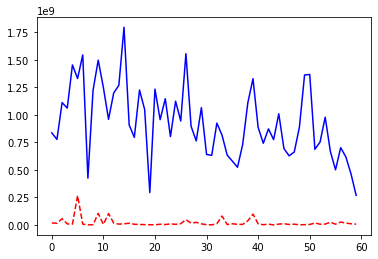

In [5]:
pyplot.plot(pmf, 'b', label = 'Metros facturados de producto.')
pyplot.plot(abs(pma), '--r', label = 'Metros abonados de vuelta.')

**Important thinks to note:**
1. We observe a cyclical component in both quantities, metres product and its value when we talk about sells, therefore we can tidy the column 'Fecha' and keep only the month in order to use it as a dimension for our model.

2. In both cases (metres and euros) the refunds are almost constant among time, this could be useful to get relations with out getting bias because of the business cycle. So could make use of it to analyze how likelable is an order to be refund in a future.

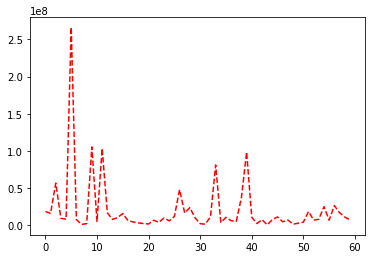

In [6]:
pyplot.plot(abs(pma), '--r', label = 'Metros abonados de vuelta.')